In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("salaries.csv")

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# EDA

# Scatterplot:

<AxesSubplot:xlabel='rank', ylabel='salary'>

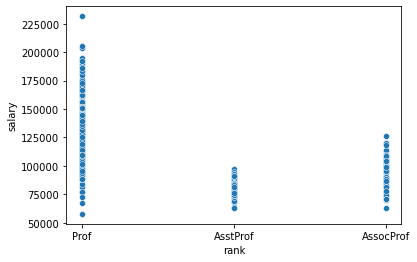

In [6]:
import seaborn as sns
sns.scatterplot(x="rank",y="salary",data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

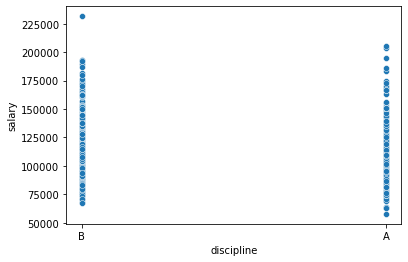

In [7]:
import seaborn as sns
sns.scatterplot(x="discipline",y="salary",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

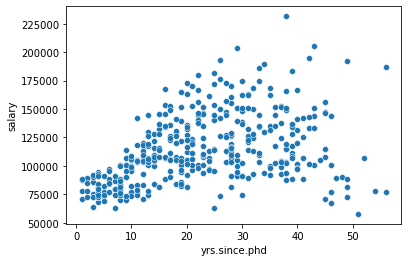

In [8]:
import seaborn as sns
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

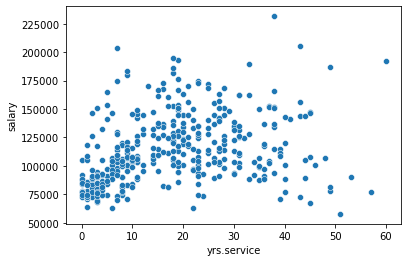

In [9]:
import seaborn as sns
sns.scatterplot(x="yrs.service",y="salary",data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

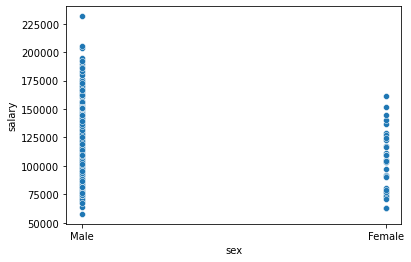

In [10]:
import seaborn as sns
sns.scatterplot(x="sex",y="salary",data=df)

In [11]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [13]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [14]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


# Correlation

In [15]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [16]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

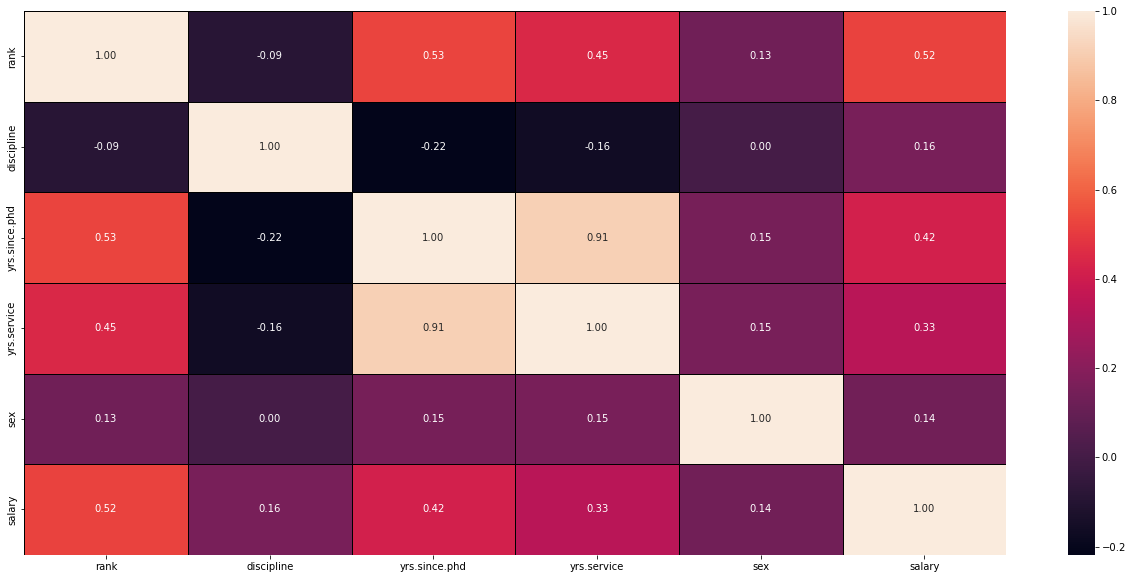

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt="0.2f")

# Describing Datasets:

In [18]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


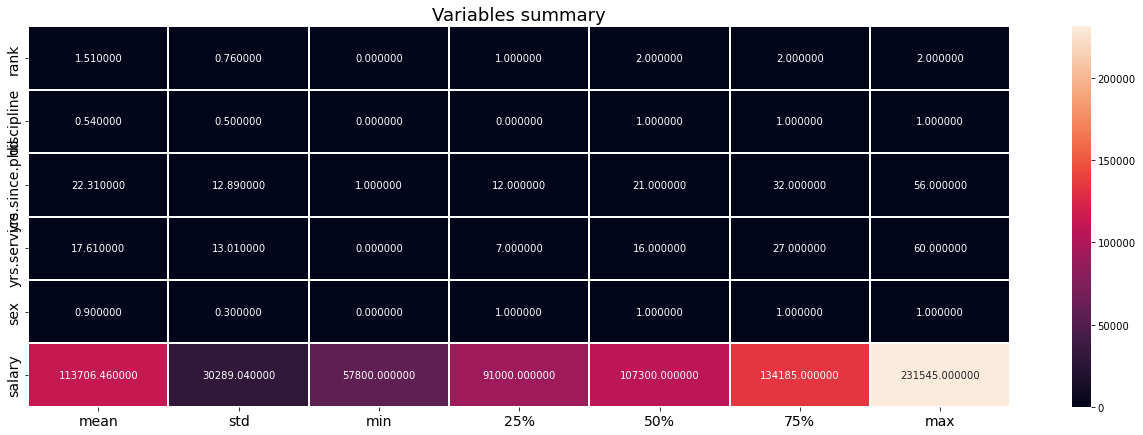

In [19]:
plt.figure(figsize=(22,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Variables summary',fontsize=18)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


# outliers checking

In [21]:
import warnings
warnings.filterwarnings('ignore')

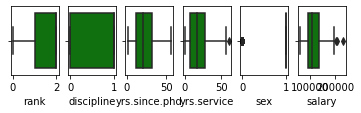

In [22]:
collist=df.columns.values
ncol=6
nrow=397
plt.figure(figsize=(ncol,100*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    

# skewness

In [23]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Normal Distribution Curve:

<AxesSubplot:xlabel='rank', ylabel='Density'>

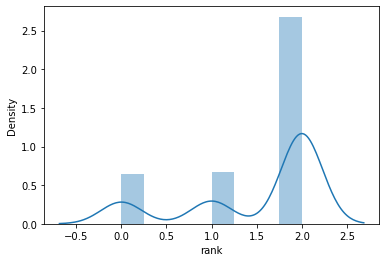

In [24]:
sns.distplot(df["rank"])

<AxesSubplot:xlabel='discipline', ylabel='Density'>

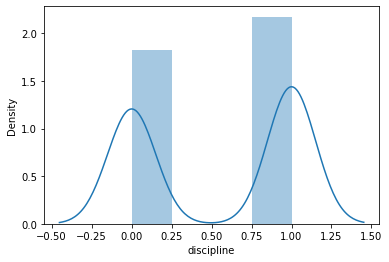

In [25]:
sns.distplot(df["discipline"])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

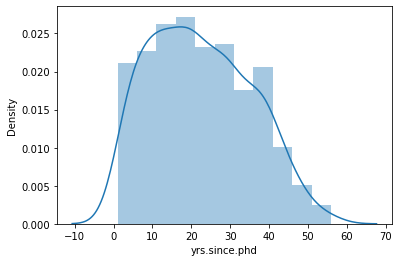

In [26]:
sns.distplot(df["yrs.since.phd"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

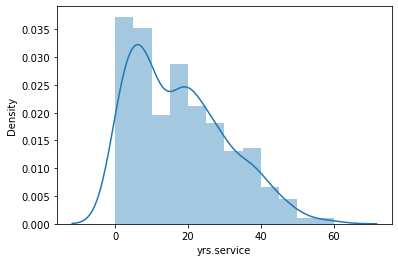

In [27]:
sns.distplot(df["yrs.service"])

<AxesSubplot:xlabel='sex', ylabel='Density'>

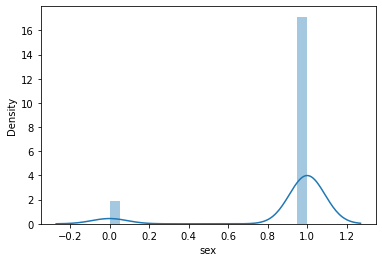

In [28]:
sns.distplot(df["sex"])

<AxesSubplot:xlabel='salary', ylabel='Density'>

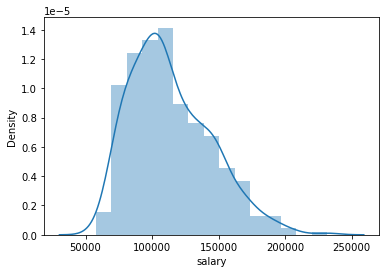

In [29]:
sns.distplot(df["salary"])

In [30]:
df.corr()["salary"]

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

In [31]:
df.shape

(397, 6)

# Removing outliers

In [32]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [33]:
df1=df[(z<3).all(axis=1)]
df1

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [34]:
df1.shape

(354, 6)

# Percentage data loss:

In [35]:
Data_loss=((397-354)/397)*100

In [36]:
Data_loss

10.831234256926953

Dividing datain features and vectors

In [37]:
## independent column
x=df1.iloc[:,:-1]
#target
y=df1.iloc[:,-1]

# Transforming data to remove skewness:

In [38]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [39]:
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [40]:
pd.DataFrame(x).skew()

0   -0.905242
1   -0.182308
2   -0.146134
3   -0.138197
4    0.000000
dtype: float64

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [42]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is :- 0.381611058352638
At random state 0,the testing accuracy is :- 0.41263683167613807


At random state 1,the training accuracy is :- 0.3684272348327665
At random state 1,the testing accuracy is :- 0.4097259708231513


At random state 2,the training accuracy is :- 0.38016166955297703
At random state 2,the testing accuracy is :- 0.4193485318146386


At random state 3,the training accuracy is :- 0.38454305566470426
At random state 3,the testing accuracy is :- 0.41029140384650886


At random state 4,the training accuracy is :- 0.3764843462902884
At random state 4,the testing accuracy is :- 0.40933753902906533


At random state 5,the training accuracy is :- 0.3891804529537908
At random state 5,the testing accuracy is :- 0.3916156739842592


At random state 6,the training accuracy is :- 0.3464345730753069
At random state 6,the testing accuracy is :- 0.4857901490093849


At random state 7,the training accuracy is :- 0.3928114057673554
At random stat

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12)

In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
pred_test=lr.predict(x_test)

In [51]:
print(r2_score(y_test,pred_test))

0.4090498681207029


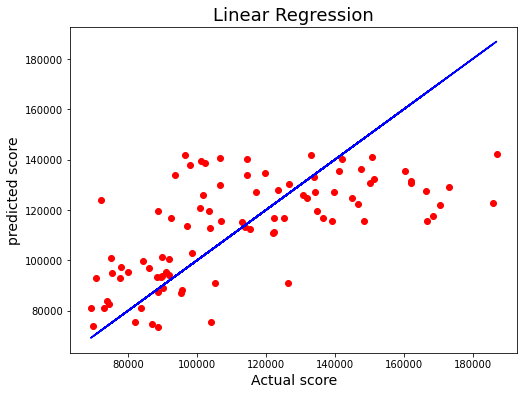

In [52]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual score',fontsize=14)
plt.ylabel('predicted score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()